<a href="https://colab.research.google.com/github/IrfansyahAdam/Data-Analytics-and-Visualization-Project/blob/main/Data%20Scientist%20KKL%20Project/Anomaly%20Detection%20and%20Prediction%20of%20Property%20Prices%20A%20Case%20Study%20of%20Melbourne%20Housing%20Dataset/Irfansyah_Adam_KKL_SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import data_table
data_table.enable_dataframe_formatter()


Saving Melbourne_housing_FULL.csv to Melbourne_housing_FULL (1).csv


In [ ]:
from google.colab import data_table
from vega_datasets import data

data_table.enable_dataframe_formatter()

data.airports()

,iata,name,city,state,country,latitude,longitude
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


In [ ]:

# Load dataset from uploaded file
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()  # Preview the dataset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float

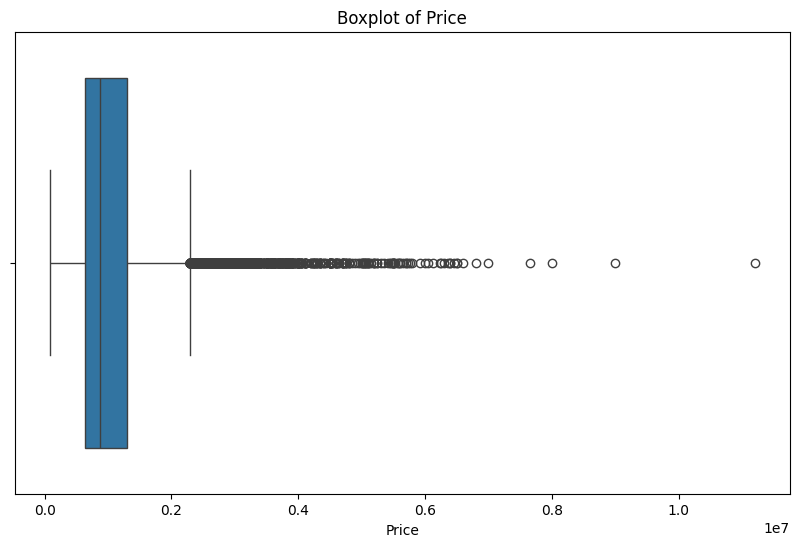

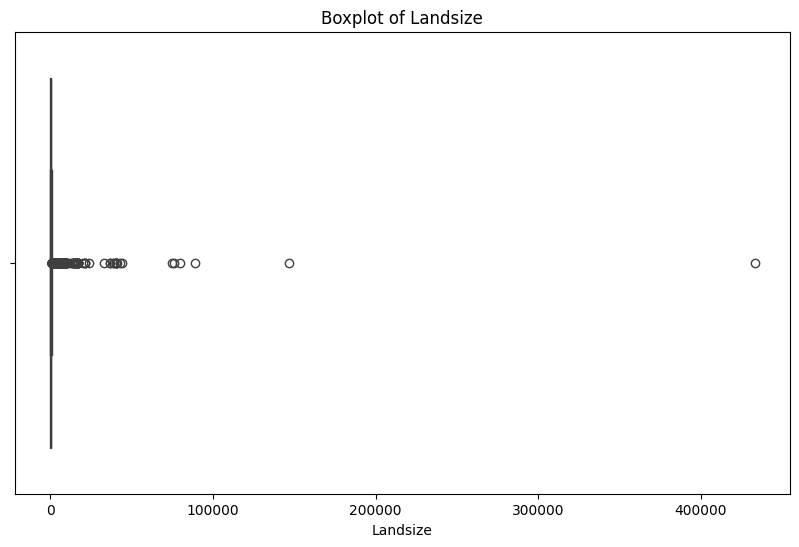

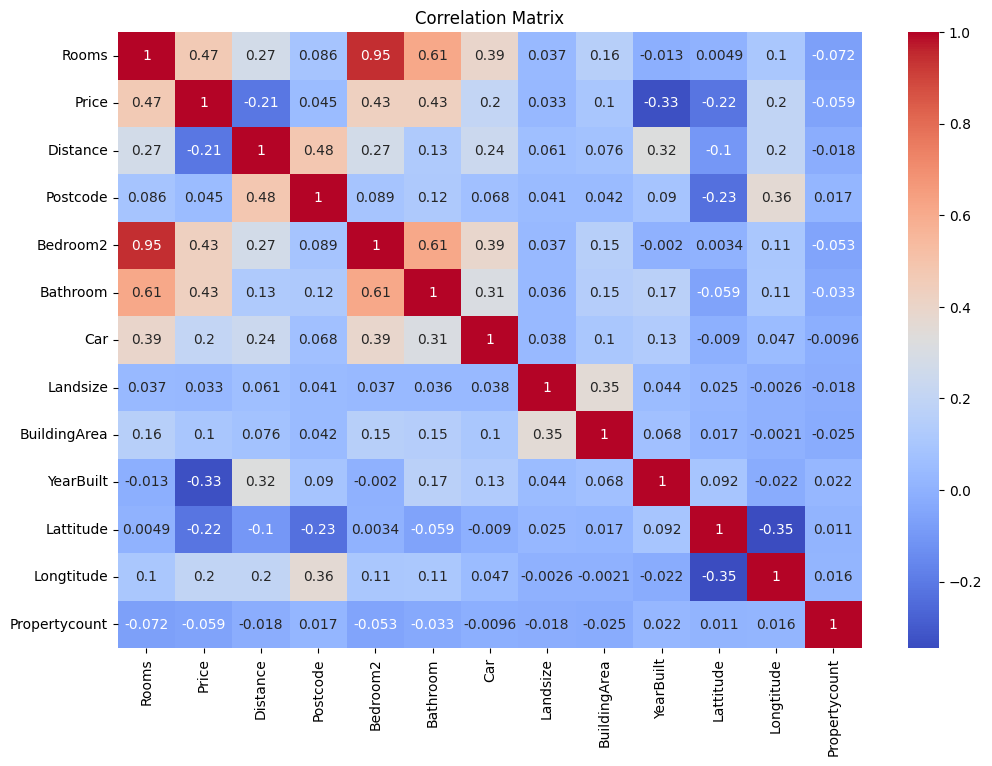

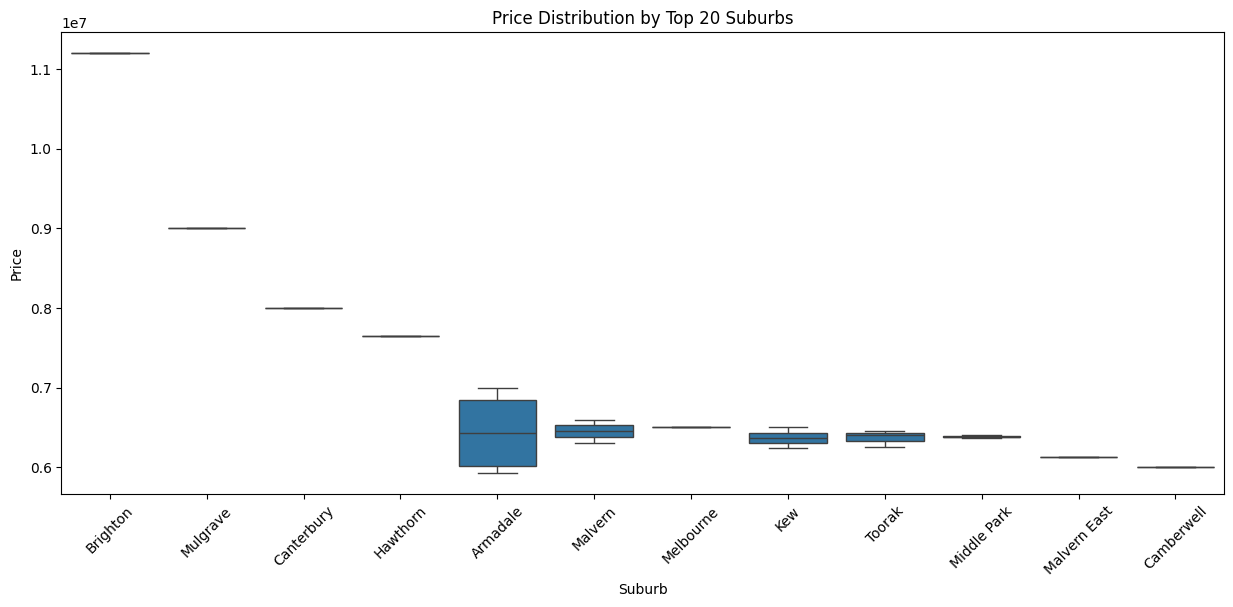


Jumlah outlier dalam harga: 1278
Statistik outlier harga:
count    1.278000e+03
mean     3.049166e+06
std      8.739251e+05
min      2.286000e+06
25%      2.475000e+06
50%      2.770000e+06
75%      3.300000e+06
max      1.120000e+07
Name: Price, dtype: float64


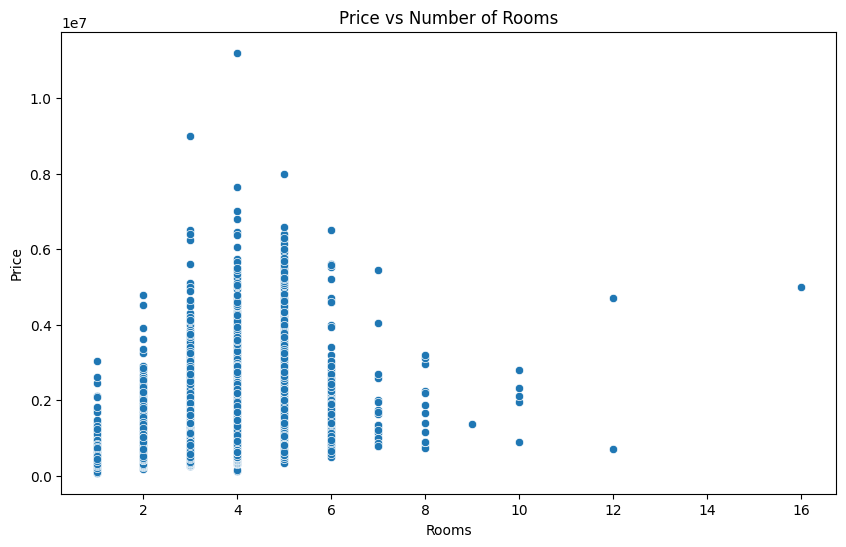

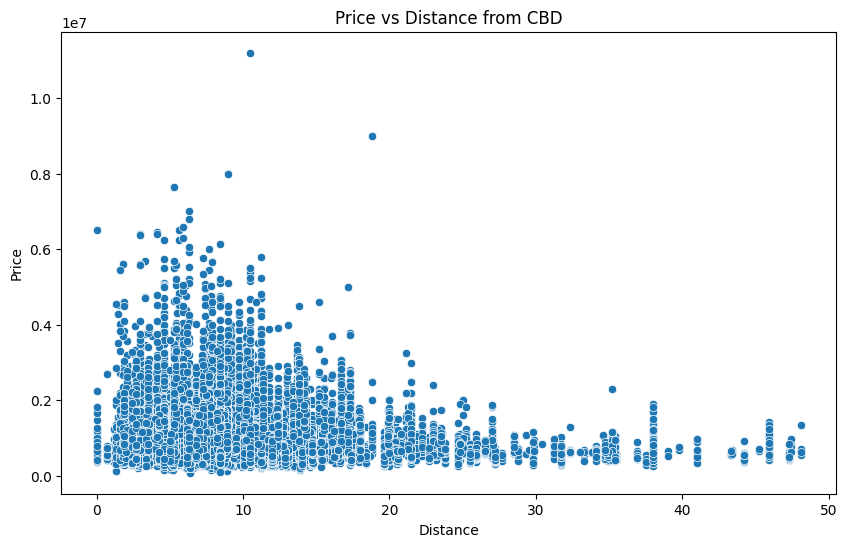


Ringkasan Statistik 10 Suburb Termahal:
                     Price                                    Rooms   Distance
                      mean     median           std count      mean       mean
Suburb                                                                        
Canterbury    2.386271e+06  2300000.0  1.316276e+06    85  3.540146   8.719708
Middle Park   2.232148e+06  1880000.0  1.339684e+06    54  2.987342   3.515190
Malvern       2.087619e+06  1995000.0  1.417365e+06   118  3.018018   6.791892
Deepdene      2.001786e+06  1750000.0  1.093479e+06     7  3.727273   7.900000
Brighton      1.984227e+06  1800000.0  1.194685e+06   317  3.214912  10.880702
Albert Park   1.927651e+06  1810000.0  7.669222e+05    93  2.862595   3.178626
Balwyn        1.893712e+06  1810000.0  9.625847e+05   224  3.454545   8.915674
Camberwell    1.861133e+06  1835000.0  9.382673e+05   280  3.418440   7.753428
Kew           1.796676e+06  1565000.0  1.112383e+06   313  3.306210   5.507495
Balwyn Nort

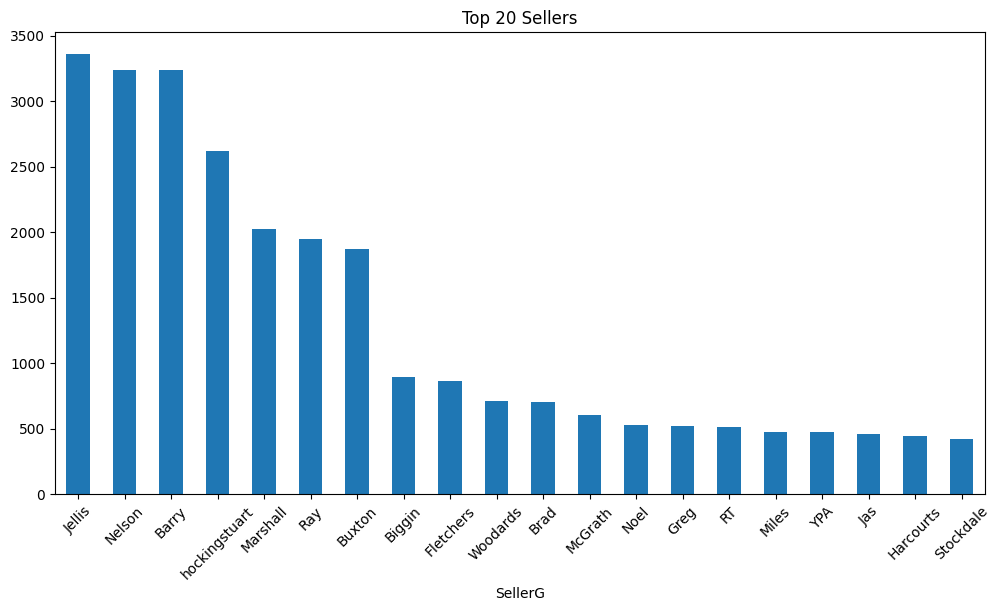


Rekomendasi Rumah berdasarkan kriteria:
                Suburb     Price  Rooms  Distance  SellerG
3063         Caulfield  131000.0      4       8.9   Rodney
3290            Coburg  145000.0      4       7.8   Jellis
5444   Heidelberg West  330000.0      3       9.4    Barry
11769   West Footscray  347000.0      3       8.2      Jas
26252          Newport  380000.0      3       6.2  McGrath


In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Baca dataset
df = pd.read_csv('Melbourne_housing_FULL.csv')

# 1. Analisis Data Awal
print("Info Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

# 2. Deteksi dan Visualisasi Outlier

# Function untuk plot boxplot
def plot_boxplot(data, feature):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

# Analisis outlier untuk harga
plot_boxplot(df, 'Price')

# Analisis outlier untuk luas tanah
plot_boxplot(df, 'Landsize')

# 3. Analisis Korelasi
# Pilih kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 4. Analisis Distribusi Harga berdasarkan Suburb
plt.figure(figsize=(15, 6))
sns.boxplot(x='Suburb', y='Price', data=df.sort_values('Price', ascending=False).head(20))
plt.xticks(rotation=45)
plt.title('Price Distribution by Top 20 Suburbs')
plt.show()

# 5. Deteksi Outlier menggunakan IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Analisis outlier untuk harga
price_outliers = detect_outliers(df, 'Price')
print("\nJumlah outlier dalam harga:", len(price_outliers))
print("Statistik outlier harga:")
print(price_outliers.describe())

# 6. Analisis Berdasarkan Rooms
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rooms', y='Price')
plt.title('Price vs Number of Rooms')
plt.show()

# 7. Analisis Berdasarkan Distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Distance', y='Price')
plt.title('Price vs Distance from CBD')
plt.show()

# 8. Ringkasan Statistik berdasarkan Suburb
suburb_summary = df.groupby('Suburb').agg({
    'Price': ['mean', 'median', 'std', 'count'],
    'Rooms': 'mean',
    'Distance': 'mean'
}).sort_values(('Price', 'mean'), ascending=False)

print("\nRingkasan Statistik 10 Suburb Termahal:")
print(suburb_summary.head(10))

# 9. Analisis Penjual (Seller)
plt.figure(figsize=(12, 6))
df['SellerG'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Sellers')
plt.xticks(rotation=45)
plt.show()

# 10. Rekomendasi
def get_recommendations(df, budget, preferred_rooms, max_distance):
    recommendations = df[
        (df['Price'] <= budget) &
        (df['Rooms'] >= preferred_rooms) &
        (df['Distance'] <= max_distance)
    ].sort_values('Price', ascending=True)

    return recommendations

# Contoh pencarian rekomendasi
budget = 1000000  # Budget 1 juta
preferred_rooms = 3  # Minimal 3 kamar
max_distance = 10  # Maksimal 10 km dari CBD

recommendations = get_recommendations(df, budget, preferred_rooms, max_distance)
print("\nRekomendasi Rumah berdasarkan kriteria:")
print(recommendations[['Suburb', 'Price', 'Rooms', 'Distance', 'SellerG']].head())

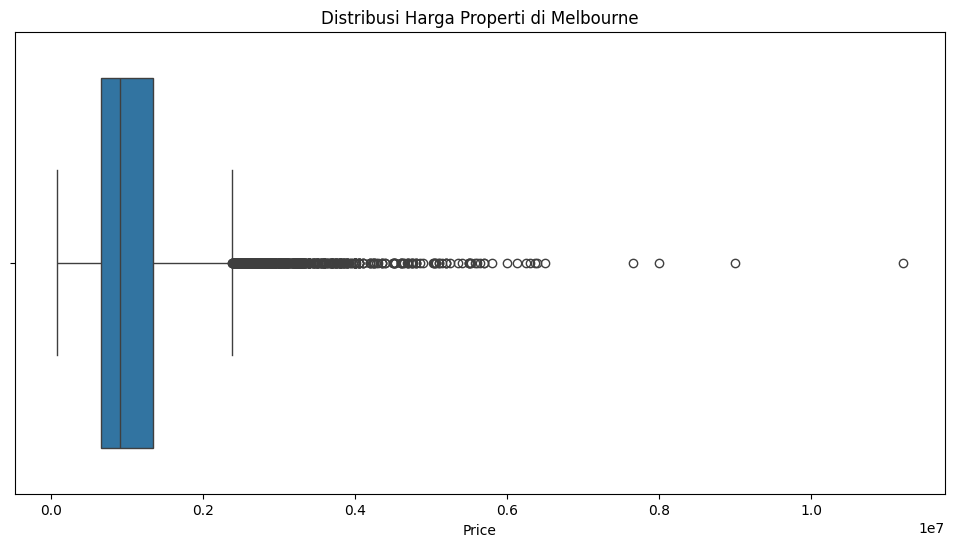

<ipython-input-20-1495b63127b7>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=suburb_analysis.index[:10], y=suburb_analysis['Price'][:10], palette="viridis")


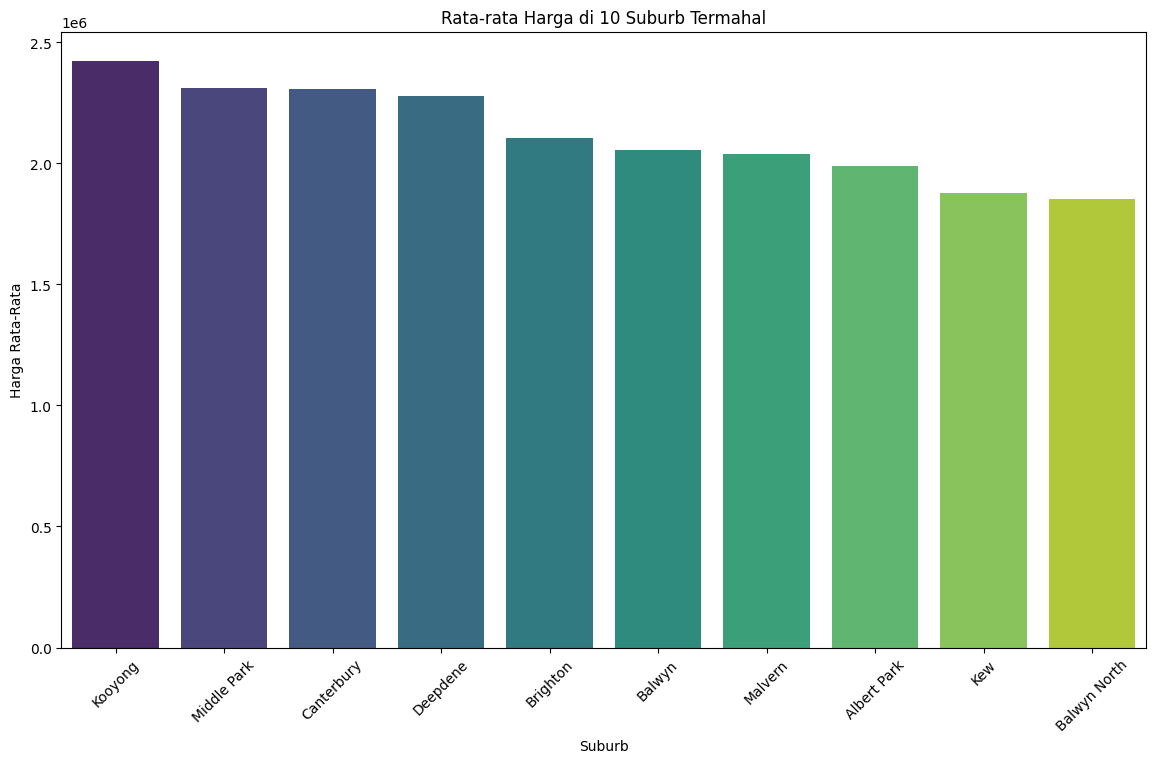

<ipython-input-20-1495b63127b7>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seller_analysis.index, y=seller_analysis.values, palette="coolwarm")


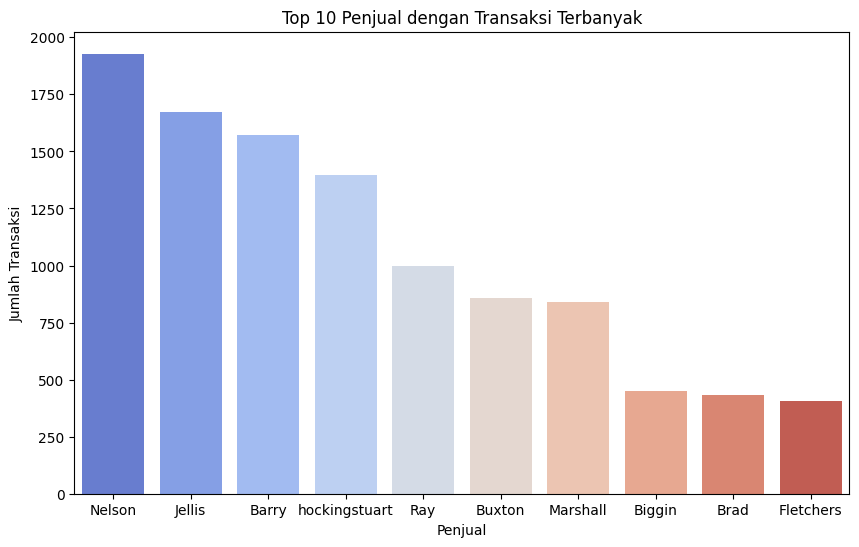

Ringkasan analisis disimpan sebagai 'ringkasan_data_perbandingan_rumah.xlsx'


In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load data
file_path = '/content/Melbourne_housing_FULL.csv'  # Sesuaikan dengan lokasi file di Google Colab
df = pd.read_csv(file_path)

# 1. Tampilkan sekilas data
df.head()

# 2. Pilih kolom relevan untuk analisis (misal: Harga, Kondisi Lingkungan, Jarak, Tipe Penjual, dll)
selected_columns = ['Price', 'Rooms', 'Distance', 'SellerG', 'Suburb', 'Type', 'Landsize']
df = df[selected_columns]

# 3. Tangani data yang hilang dengan menghapus atau mengisi nilai yang hilang
df.dropna(inplace=True)

# 4. Identifikasi dan analisis outlier pada kolom harga menggunakan Z-score
df['Zscore_Price'] = zscore(df['Price'])
outliers = df[df['Zscore_Price'].abs() > 3]

# Visualisasi data harga dengan outlier yang ditandai
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Price'])
plt.title('Distribusi Harga Properti di Melbourne')
plt.show()

# 5. Analisis lingkungan berdasarkan rata-rata harga, luas tanah, dan jarak dari pusat kota
# Kelompokkan data berdasarkan suburb (lingkungan)
suburb_analysis = df.groupby('Suburb').agg({
    'Price': 'mean',
    'Distance': 'mean',
    'Landsize': 'mean'
}).sort_values(by='Price', ascending=False)

# Visualisasi perbandingan rata-rata harga per lingkungan
plt.figure(figsize=(14, 8))
sns.barplot(x=suburb_analysis.index[:10], y=suburb_analysis['Price'][:10], palette="viridis")
plt.xticks(rotation=45)
plt.title('Rata-rata Harga di 10 Suburb Termahal')
plt.ylabel('Harga Rata-Rata')
plt.xlabel('Suburb')
plt.show()

# 6. Analisis data penjual untuk mengetahui konsistensi penjual berdasarkan jumlah transaksi
seller_analysis = df['SellerG'].value_counts().head(10)

# Visualisasi penjual teratas
plt.figure(figsize=(10, 6))
sns.barplot(x=seller_analysis.index, y=seller_analysis.values, palette="coolwarm")
plt.title('Top 10 Penjual dengan Transaksi Terbanyak')
plt.ylabel('Jumlah Transaksi')
plt.xlabel('Penjual')
plt.show()

# 7. Simpan ringkasan data untuk presentasi
with pd.ExcelWriter('ringkasan_data_perbandingan_rumah.xlsx') as writer:
    suburb_analysis.to_excel(writer, sheet_name='Analisis Lingkungan')
    seller_analysis.to_frame(name='Jumlah Transaksi').to_excel(writer, sheet_name='Analisis Penjual')
    outliers.to_excel(writer, sheet_name='Outlier Harga')

print("Ringkasan analisis disimpan sebagai 'ringkasan_data_perbandingan_rumah.xlsx'")

# 8. Buat presentasi dari hasil analisis
# Dengan alat seperti matplotlib dan seaborn, buat visualisasi tambahan jika diperlukan


In [ ]:
# prompt: buatkan list 20 rumah terbaik untuk dibeli, dengan harga terendah dan ruang nya banyak

def get_best_houses(df, top_n=20):
  """
  Mencari rumah terbaik dengan harga terendah dan ruang yang banyak.

  Args:
    df: DataFrame properti.
    top_n: Jumlah rumah terbaik yang ingin ditampilkan.

  Returns:
    DataFrame dengan rumah terbaik.
  """

  # Filter data untuk mendapatkan rumah dengan harga dan ruang yang diinginkan
  best_houses = df.loc[(df['Price'] > 0) & (df['Rooms'] > 0) & (df['Landsize'] > 0)].sort_values(['Price', 'Rooms'], ascending=[True, False])

  return best_houses.head(top_n)


# Panggil fungsi untuk mendapatkan 20 rumah terbaik
top_houses = get_best_houses(df, top_n=20)

print("20 Rumah Terbaik untuk Dibeli bedasarkan kamar banyak harga rendah:")
print(top_houses[['Suburb', 'Price', 'Rooms', 'Landsize']])

20 Rumah Terbaik untuk Dibeli bedasarkan kamar banyak harga rendah:
               Suburb     Price  Rooms  Landsize
3063        Caulfield  131000.0      4     499.0
3290           Coburg  145000.0      4     536.0
11859          Albion  145000.0      1      36.0
12947        Hawthorn  160000.0      1     322.0
14380       Footscray  170000.0      1      30.0
21012       Brunswick  170000.0      1    1250.0
11848          Albion  185000.0      1    2347.0
13970          Albion  200000.0      1    1175.0
4838          Glenroy  230000.0      2    1996.0
8644        Reservoir  240000.0      2      82.0
15637       Footscray  240000.0      1    1015.0
17331        Sunshine  245000.0      1      44.0
7759      Pascoe Vale  248500.0      1      49.0
19118         Preston  250000.0      1     631.0
18226     Pascoe Vale  257500.0      1     995.0
9751         Sunshine  260000.0      2      79.0
8370        Reservoir  260000.0      1     141.0
12828     Glen Huntly  260000.0      1    1162.0
1

In [ ]:
# prompt: buatkan list 20 rumah terbaik untuk dibeli, dengan harga terendah dan tanah besar

def get_best_houses(df, top_n=20):
  """
  Mencari rumah terbaik dengan harga terendah dan tanah luas.

  Args:
    df: DataFrame properti.
    top_n: Jumlah rumah terbaik yang ingin ditampilkan.

  Returns:
    DataFrame dengan rumah terbaik.
  """

  # Filter data untuk mendapatkan rumah dengan harga dan tanah yang diinginkan
  best_houses = df.loc[(df['Price'] > 0) & (df['Landsize'] > 0)].sort_values(['Price', 'Landsize'], ascending=[True, False])

  return best_houses.head(top_n)


# Panggil fungsi untuk mendapatkan 20 rumah terbaik
top_houses = get_best_houses(df, top_n=20)

print("20 Rumah Terbaik untuk Dibeli bedasarkan harga rendah dan tanah luas:")
print(top_houses[['Suburb', 'Price', 'Rooms', 'Landsize']])

20 Rumah Terbaik untuk Dibeli bedasarkan harga rendah dan tanah luas:
               Suburb     Price  Rooms  Landsize
3063        Caulfield  131000.0      4     499.0
3290           Coburg  145000.0      4     536.0
11859          Albion  145000.0      1      36.0
12947        Hawthorn  160000.0      1     322.0
21012       Brunswick  170000.0      1    1250.0
14380       Footscray  170000.0      1      30.0
11848          Albion  185000.0      1    2347.0
13970          Albion  200000.0      1    1175.0
4838          Glenroy  230000.0      2    1996.0
15637       Footscray  240000.0      1    1015.0
8644        Reservoir  240000.0      2      82.0
17331        Sunshine  245000.0      1      44.0
7759      Pascoe Vale  248500.0      1      49.0
19118         Preston  250000.0      1     631.0
18226     Pascoe Vale  257500.0      1     995.0
12828     Glen Huntly  260000.0      1    1162.0
8370        Reservoir  260000.0      1     141.0
9751         Sunshine  260000.0      2      79.0